# PCA Analysis

In [28]:
import init
from common import constants as cn
from common.trinary_data import TrinaryData
from common.data_provider import DataProvider
from common_python.plots import util_plots
from plots import util_plots as xutil_plots

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
data = TrinaryData()
data.df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
T1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
pd.DataFrame(data.ser_y)

,name
timepoint,
T1,0
T2,1
T3,1
T4,1
T5,1
T6,1
T7,1
T8,2
T9,2


In [176]:
def plotPCA(df, ser, columns, ax, title, is_legend=True): 
    ax.set_xlabel(columns[0], fontsize = 15)
    ax.set_ylabel(columns[1], fontsize = 15)
    ax.set_title(title, fontsize = 20)
    targets = ser.unique()
    colors = ['red', 'green', 'black', 'yellow', 'brown', 'pink']
    for target, color in zip(targets,colors):
        indicesToKeep = df['name'] == target
        ax.scatter(df.loc[indicesToKeep, columns[0]],
                   df.loc[indicesToKeep, columns[1]],
                   c = color,
                   s = 50)
    if is_legend:
        #ax.legend(targets, loc=1)
        ax.legend(targets, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.grid()

In [170]:
T0 = "T0"
COLUMNS = []
for idx in range(1, 5):
    stmt = "COLUMN%d = 'principal component %d'" % (idx, idx)
    exec(stmt)
    stmt = "COLUMNS.append(COLUMN%d)" % idx
    exec(stmt)
    
def doPCA2(df_X, ser_y, title=""):
    pca = PCA(n_components=2)
    if T0 in df_X.index:
        df_X1 = df_X.drop(index=[T0])
        ser_y1 = ser_y.drop(index=[T0])
    else:
        df_X1 = df_X.copy()
        ser_y1 = ser_y.copy()
    principalComponents = pca.fit_transform(df_X1)
    principal_df = pd.DataFrame(data = principalComponents,
                 columns = COLUMNS[0:2])
    principal_df.index = df_X1.index
    final_df = pd.concat([principal_df, pd.DataFrame(ser_y1)], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    plotPCA(final_df, ser_y, [COLUMN1, COLUMN2], ax, title)
    return pca

    
def doPCA3(df_X, ser_y, title=""):
    NUMPCA = 3
    pca = PCA(n_components=NUMPCA)
    if T0 in df_X.index:
        df_X1 = df_X.drop(index=[T0])
        ser_y1 = ser_y.drop(index=[T0])
    else:
        df_X1 = df_X.copy()
        ser_y1 = ser_y.copy()
    principalComponents = pca.fit_transform(df_X1)
    principal_df = pd.DataFrame(data = principalComponents,
                 columns = COLUMNS[0:NUMPCA])
    principal_df.index = df_X1.index
    final_df = pd.concat([principal_df, pd.DataFrame(ser_y1)], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(2,2,1)
    plotPCA(final_df, ser_y, [COLUMN2, COLUMN1], ax, title, is_legend=False)
    ax = fig.add_subplot(2,2,2)
    plotPCA(final_df, ser_y, [COLUMN3, COLUMN1], ax, "", is_legend=False)
    ax.yaxis.set_label_position("right")
    ax = fig.add_subplot(2,2,3)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plotPCA(final_df, ser_y, [COLUMN2, COLUMN3], ax, "")
    return pca

In [102]:
COLUMNS

['principal component 0',
 'principal component 1',
 'principal component 2',
 'principal component 3',
 'principal component 4']

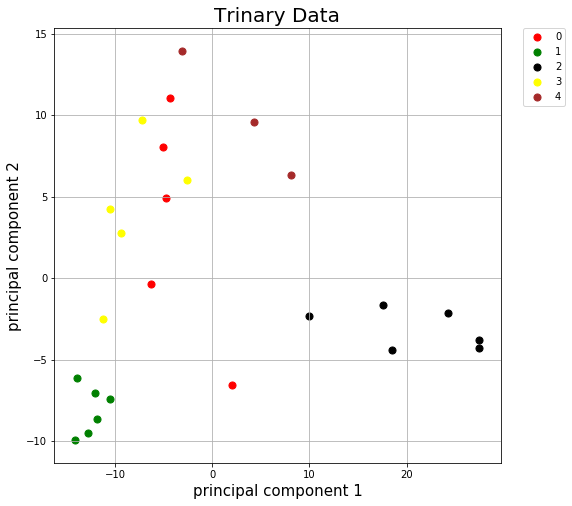

In [177]:
pca = doPCA2(data.df_X, data.ser_y, title="Trinary Data")

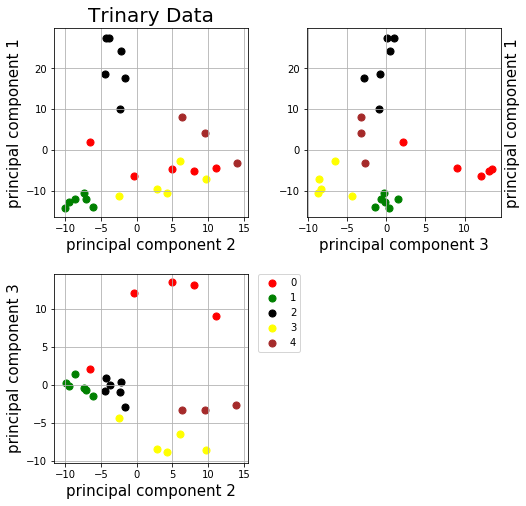

In [178]:
pca = doPCA3(data.df_X, data.ser_y, title="Trinary Data")

In [95]:
pca.explained_variance_

array([182.80210002,  50.5064734 ,  37.88251981,  20.17860887])

**observations**
1. States 0, 3, 4 overlap.

In [133]:
provider = DataProvider()
provider.do()
df_X = provider.df_normalized.head()

In [134]:
ser_y = provider.df_stage_matrix['name']
df_X = provider.df_normalized.T

In [141]:
data.df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
T1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [142]:
ser_y.head()

timepoint
T0      Normoxia
T1      Normoxia
T2    Transition
T3    Transition
T4    Transition
Name: name, dtype: object

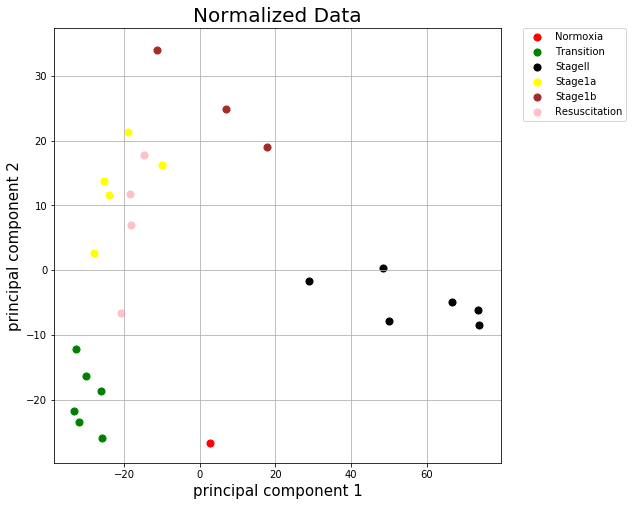

In [180]:
_ = doPCA2(df_X, ser_y, title="Normalized Data")

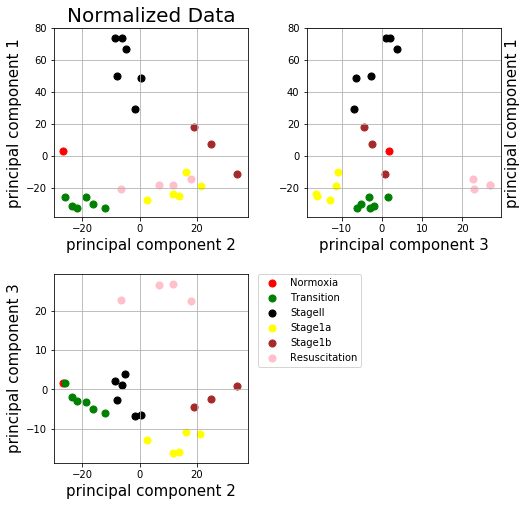

In [181]:
_ = doPCA3(df_X, ser_y, title="Normalized Data")

In [ ]:
doPCA3(df_X, ser_y, title="Normalized Data")

In [78]:
df_stage = provider.df_stage_matrix.reset_index()
df_stage['sample'] = df_stage['timepoint']
df_stage.head()

,timepoint,name,color,sample
0,T0,Normoxia,b,T0
1,T1,Normoxia,b,T1
2,T2,Transition,c,T2
3,T3,Transition,c,T3
4,T4,Transition,c,T4


In [80]:
provider.df_hypoxia.head()

,sample,hours,avg_DO,0,1,2,mean,std,cv
0,T0,0.0,81.62,NaN,NaN,NaN,NaN,NaN,NaN
1,T1,17.3,57.63,57.63,59.56,57.89,58.360000,1.047330,1.794602
2,T2,23.3,NaN,42.77,44.90,42.92,43.530000,1.188823,2.731043
3,T3,41.4,11.51,11.51,13.06,11.84,12.136667,0.816476,6.727351
4,T4,42.2,8.82,8.82,9.30,9.57,9.230000,0.379868,4.115584


In [84]:
dff = provider.df_hypoxia.merge(df_stage, on="sample", how='inner')
dff.head()

,sample,hours,avg_DO,0,1,2,mean,std,cv,timepoint,name,color
0,T0,0.0,81.62,NaN,NaN,NaN,NaN,NaN,NaN,T0,Normoxia,b
1,T1,17.3,57.63,57.63,59.56,57.89,58.360000,1.047330,1.794602,T1,Normoxia,b
2,T2,23.3,NaN,42.77,44.90,42.92,43.530000,1.188823,2.731043,T2,Transition,c
3,T3,41.4,11.51,11.51,13.06,11.84,12.136667,0.816476,6.727351,T3,Transition,c
4,T4,42.2,8.82,8.82,9.30,9.57,9.230000,0.379868,4.115584,T4,Transition,c


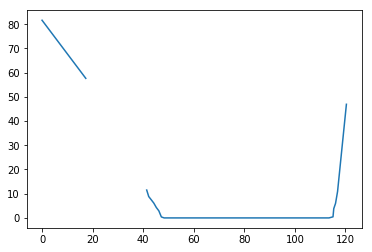

In [85]:
plt.plot(dff['hours'], dff['avg_DO'])

## PCA Eigenvectors

In [183]:
def analyzePCA(df_X, ser_y):
    pca = PCA(n_components=2)
    if T0 in df_X.index:
        df_X1 = df_X.drop(index=[T0])
        ser_y1 = ser_y.drop(index=[T0])
    else:
        df_X1 = df_X.copy()
        ser_y1 = ser_y.copy()
    principalComponents = pca.fit_transform(df_X1)
    principal_df = pd.DataFrame(data = principalComponents,
                 columns = COLUMNS[0:2])
    principal_df.index = df_X1.index
    final_df = pd.concat([principal_df, pd.DataFrame(ser_y1)], axis = 1)
    return pca, final_df

In [184]:
pca, final_df = analyzePCA(data.df_X, data.ser_y)

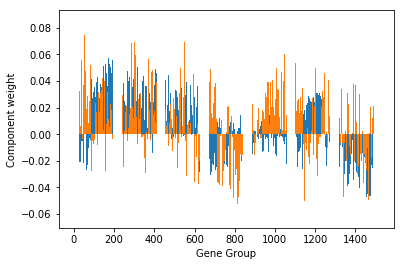

In [192]:
fig, ax = plt.subplots()
for component in pca.components_:
    ax.bar(range(len(component)), component)
    ax.set_xlabel("Gene Group")
    ax.set_ylabel("Component weight")

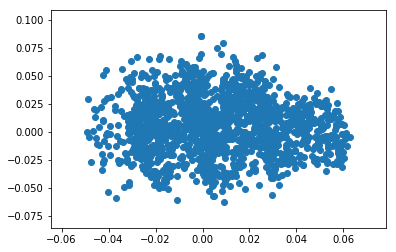

In [193]:
# Analysis of relationships between coordinates
fig, ax = plt.subplots()
ax.scatter(pca.components_[0], pca.components_[1])

In [196]:
pca.components_[0].dot(pca.components_[1])

-5.204170427930421e-18